# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [3]:
data = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple

In [4]:
apple = pd.read_csv(data)

apple[:5]

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [5]:
apple.info()

apple.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.0+ KB


,Open,High,Low,Close,Volume,Adj Close
count,8465.000000,8465.000000,8465.000000,8465.000000,8.465000e+03,8465.000000
mean,98.593926,99.848683,97.226790,98.549199,9.391214e+07,11.095014
std,141.965350,143.155674,140.548326,141.877244,8.993202e+07,21.133016
min,11.120000,11.120000,11.000000,11.000000,2.504000e+05,0.170000
25%,25.750000,26.000000,25.120000,25.630000,3.704960e+07,0.900000
50%,40.750000,41.500000,40.000000,40.750000,6.636000e+07,1.410000
75%,79.500000,81.000000,78.740000,80.000000,1.177701e+08,8.660000
max,702.410000,705.070000,699.570000,702.100000,1.855410e+09,96.280000


### Step 5. Transform the Date column as a datetime type

In [12]:
apple.Date = apple.Date.astype('datetime64[ns]')

apple.info()

apple[:5]

# Also coulda done pd.to_datetime(apple.Date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null datetime64[ns]
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.0 KB


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 6.  Set the date as the index

In [42]:
apple.set_index('Date', inplace=True)

### Step 7.  Is there any duplicate dates?

In [63]:
apple[apple.duplicated() == True]

# I guess not?

# Said another way

apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [28]:
# apple.sort_index(axis=1, ascending=True)

apple.sort_index(ascending=True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

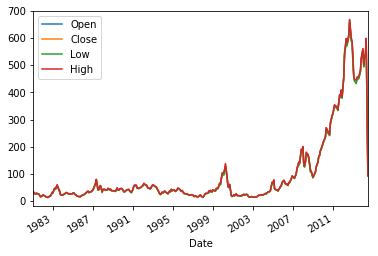

In [47]:
apple[apple.index.day == apple.index.days_in_month][['Open', 'Close', 'Low', 'High']].plot()
# so sick!

In [65]:
apple[apple.index.day == apple.index.days_in_month].head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-06-30,92.10,93.73,92.09,92.93,49482300,92.93
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76
2014-01-31,495.18,501.53,493.55,500.60,116199300,70.69


In [68]:
# They wanted something slightly different

apple.resample('BM').mean().sort_index(ascending=False).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-31,94.294000,95.004000,93.488000,94.470000,4.218366e+07,94.470000
2014-06-30,222.360000,224.084286,220.735714,222.658095,5.745506e+07,91.885714
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000


### Step 10.  What is the difference in days between the first day and the oldest

In [57]:
apple.index.day[:1]

# apple.index.day[-1:]

Int64Index([12], dtype='int64', name='Date')

### Step 11.  How many months in the data we have?

In [62]:
apple.index.month.unique

<bound method Index.unique of Int64Index([ 7,  7,  7,  7,  7,  6,  6,  6,  6,  6,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=8465)>

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

### BONUS: Create your own question and answer it.